# Data Visualization

Importing libraries

In [11]:
import pandas as pd
import numpy as np
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot   # offline mode of plotly
init_notebook_mode(connected=True)                                             # javascript for interactive plot
import cufflinks as cf                                                         # connector between pandas and plotly
cf.go_offline()

Loading the dataset for visualization

In [12]:
import seaborn as sns
dataset = sns.load_dataset('tips')
print(dataset.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


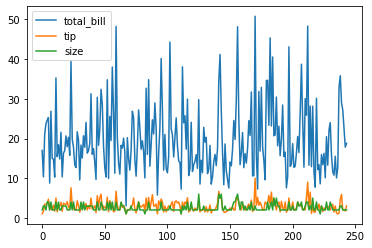

In [13]:
data = dataset[['total_bill','tip','size']]
data.plot()

In [14]:
data.iplot(kind = 'line')

In [15]:
dataset['total_bill'].where((dataset['sex'] == 'Male') & (dataset['time'] == 'Dinner')).sum()

2661.2200000000003

In [16]:
dataset.iplot(kind = 'bar',x = ['time','sex'],y = 'total_bill')         # refer the second bar

In [17]:
dataset.mean().iplot(kind = 'bar')       # calculates mean for numerical columns

In [18]:
dataset.sum().iplot(kind = 'barh')

In [19]:
dataset.iplot(kind = 'scatter',x = ['total_bill'],y = ['tip'],mode = 'markers')

In [20]:
dataset['total_bill'].iplot(kind = 'hist',bins = 25)

In [21]:
dataset[['total_bill','tip']].iplot(kind = 'spread')

C:\ProgramData\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



# Advance plotly

barchart (Categorical values on x axis). 

In [22]:
import plotly.graph_objs as go
init_notebook_mode(connected=True)  

In [23]:
trace = go.Bar(x = ['January','February','March'],y = ['5','6','8'])   # Trace the data

data = [trace]  # Make a list

layout = {"title":"sales for first three months",   # Make a dictionary
           "xaxis":{"title":"Month","tickangle":-20},
           "yaxis":{"title":"Sales"}
         }


In [24]:
iplot({"data":data,"layout":layout})     # print the data

Histogram

In [25]:
import random
np.random.seed(1234)
age = np.random.uniform(21,75,100)
salary = np.random.normal(3000,1000,100)
gender = ['male','female']
binary_gender = random.choices(gender,k = 100)

In [26]:
import pandas as pd
df = pd.DataFrame({"Age":age,"Salary":salary,"Gender":binary_gender})
female = df[df['Gender'] == 'female']
male = df[df['Gender'] == 'male']

In [27]:
trace = go.Histogram(x = df['Age'])
data = [trace]

layout = {"title":"sales for first three months",   # Make a dictionary
           "xaxis":{"title":"Month"},
           "yaxis":{"title":"Sales"}
         }

iplot({"data":data,"layout":layout})

stack histogram

In [28]:
trace0 = go.Histogram(x = male['Age'],name = "male",opacity = 0.6)

trace1 = go.Histogram(x = female['Age'],name = "female",opacity = 0.6)

layout = {"title":"Histogram male vs female count",   # Make a dictionary
           "xaxis":{"title":"male vs female"},
           "yaxis":{"title":"Count"},
            "barmode":"stack"}

data = [trace0,trace1]

iplot({"data":data,"layout":layout})


Scatter plot

In [29]:
import random
np.random.seed(1234)
age = np.random.uniform(21,75,100)
salary = np.random.normal(3000,1000,100)
gender = ['male','female']
binary_gender = random.choices(gender,k = 100)

import pandas as pd
df = pd.DataFrame({"Age":age,"Salary":salary,"Gender":binary_gender})
female = df[df['Gender'] == 'female']
male = df[df['Gender'] == 'male']

female_salary = np.random.randint(100,1000,100).sort()
male_salary = np.random.uniform(1000,10000,100)

In [30]:
trace = go.Scatter(x = female['Age'],y = female_salary,mode = "markers")

data = [trace]

iplot({"data":data})

In [31]:
np.random.randint(2,50,10)

array([21, 22, 49, 45,  3, 49, 42,  9, 19, 17])

# Working with plotly

In [32]:
# Imports
import plotly
from plotly import __version__
print(__version__)
from plotly.offline import iplot,plot

4.7.1


In [33]:
from plotly.offline import iplot,plot
import plotly.graph_objects as go
import numpy as np

In [34]:
N = 200
x = np.random.rand(N)
y = np.random.rand(N)

Scatter plot

In [35]:
trace = go.Scatter(
    x = x, 
    y = y,
    mode = 'markers'
    )

In [36]:
data = [trace]
iplot(data)

Pie chart

In [37]:
groups = ['Rent','Food','Bills','Misc']
amount = [1000,500,200,300]
#colors = ['Red','Blue','Green','Yellow']

trace = go.Pie(labels = groups, values = amount,textinfo = 'value')     # To show percentage on pie chart remove text info
data = [trace]
iplot(data)

Working with pubg data

In [38]:
import pandas as pd
df = pd.read_csv('PUBG.csv')
df = df.head(10)

In [39]:
df

,player_name,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
0,BreakNeck,4405,3.14,17.65,18469.14,17,3,0.83,4,23.5,...,3751590.99,5194786.58,2626.97,4372.64,536.98,2186,234,1884,242132.73,1448
1,Blackwalk,8199,4.41,18.18,33014.86,33,6,0.36,11,33.3,...,4295917.30,6051783.67,2422.48,6009.73,734.85,2041,276,2340,269795.75,1724
2,mercedes_benz,4454,3.60,0.00,4330.44,5,0,0.00,1,20.0,...,3935265.63,5589608.74,1871.89,3011.87,725.44,1766,210,2193,292977.07,1897
3,DORA,7729,14.00,50.00,13421.82,8,4,0.67,6,75.0,...,2738998.00,3796916.00,2154.62,5578.41,587.28,1214,142,1252,181106.90,1057
4,n2tstar,0,10.50,33.33,9841.04,6,2,0.40,5,83.3,...,2347295.00,3220260.00,2098.47,5642.54,546.10,1245,120,923,160029.80,1077
5,coldoxygen,33313,5.73,31.25,22003.22,16,5,0.50,10,62.5,...,3218436.00,4733977.00,2078.93,4414.86,1212.76,2023,195,2307,238640.00,1450
6,Giken,15585,2.45,8.45,148051.25,142,12,0.18,34,23.9,...,2057423.12,2883099.31,1664.77,3022.51,564.20,1274,133,1320,132008.88,775
7,KoreaNo1,9454,2.71,26.32,26091.14,19,5,0.50,10,52.6,...,3586593.00,4854387.00,1635.86,4627.86,806.24,2199,163,1864,201659.00,1287
8,undor,24029,3.68,13.64,49282.41,44,6,0.23,13,29.5,...,1054263.00,1550975.00,2207.61,4685.61,455.67,617,61,585,80498.73,513
9,Fordune,11289,4.17,25.00,10280.77,8,2,0.25,4,50.0,...,2793909.91,4071039.87,1981.29,3635.28,546.95,1320,220,1338,123573.74,675


# Scatter plot

In [40]:
trace = go.Scatter(
    x = df['solo_RoundsPlayed'],
    y = df['solo_Wins'],
    name = 'Game rounds',
    mode = 'markers'
    )
layout = go.Layout(
    title = 'Rounds played vs Rounds won',
    showlegend = True
    )
fig = go.Figure(data = [trace],layout = layout)
iplot(fig)

# Barchart

In [41]:
df = pd.read_csv('PUBG.csv')
df = df.head(20)

In [42]:
trace1 = go.Bar(
    x = df['player_name'],
    y = df['solo_RoundsPlayed'],
    name = 'Rounds played'
    )

trace2 = go.Bar(
    x = df['player_name'],
    y = df['solo_Wins'],
    name = 'wins'
    )

layout = go.Layout(barmode = 'group')

data = [trace1,trace2]

fig = go.Figure(data = data,layout = layout)
iplot(fig)

# 3D Plot


In [43]:
df = pd.read_csv('PUBG.csv')
df = df.head(10)
df

,player_name,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
0,BreakNeck,4405,3.14,17.65,18469.14,17,3,0.83,4,23.5,...,3751590.99,5194786.58,2626.97,4372.64,536.98,2186,234,1884,242132.73,1448
1,Blackwalk,8199,4.41,18.18,33014.86,33,6,0.36,11,33.3,...,4295917.30,6051783.67,2422.48,6009.73,734.85,2041,276,2340,269795.75,1724
2,mercedes_benz,4454,3.60,0.00,4330.44,5,0,0.00,1,20.0,...,3935265.63,5589608.74,1871.89,3011.87,725.44,1766,210,2193,292977.07,1897
3,DORA,7729,14.00,50.00,13421.82,8,4,0.67,6,75.0,...,2738998.00,3796916.00,2154.62,5578.41,587.28,1214,142,1252,181106.90,1057
4,n2tstar,0,10.50,33.33,9841.04,6,2,0.40,5,83.3,...,2347295.00,3220260.00,2098.47,5642.54,546.10,1245,120,923,160029.80,1077
5,coldoxygen,33313,5.73,31.25,22003.22,16,5,0.50,10,62.5,...,3218436.00,4733977.00,2078.93,4414.86,1212.76,2023,195,2307,238640.00,1450
6,Giken,15585,2.45,8.45,148051.25,142,12,0.18,34,23.9,...,2057423.12,2883099.31,1664.77,3022.51,564.20,1274,133,1320,132008.88,775
7,KoreaNo1,9454,2.71,26.32,26091.14,19,5,0.50,10,52.6,...,3586593.00,4854387.00,1635.86,4627.86,806.24,2199,163,1864,201659.00,1287
8,undor,24029,3.68,13.64,49282.41,44,6,0.23,13,29.5,...,1054263.00,1550975.00,2207.61,4685.61,455.67,617,61,585,80498.73,513
9,Fordune,11289,4.17,25.00,10280.77,8,2,0.25,4,50.0,...,2793909.91,4071039.87,1981.29,3635.28,546.95,1320,220,1338,123573.74,675


In [44]:
x = df['solo_WinRatio']
y = df['solo_TimeSurvived']
z = df['solo_RoundsPlayed']

trace1 = go.Scatter3d(
    x = x,
    y = y,
    z = z,
    mode = 'markers',
    marker = dict(size = 12,color = z,colorscale = 'Viridis',opacity = 0.8)
    )

data = [trace1]

layout = go.Layout(
    margin = dict(l = 0, r = 0, b = 0,t = 0)
    )

fig = go.Figure(data = data,layout = layout)
iplot(fig)

# Time series data visualization

In [45]:
import pandas as pd
df = pd.read_csv('Tesla.csv')
df.head()

,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.88,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700


In [46]:
df.tail()

,date,close,volume,open,high,low
752,2015/10/21,210.09,4177956.0000,211.99,214.8100,208.80
753,2015/10/20,213.03,14877020.0000,227.72,228.6000,202.00
754,2015/10/19,228.10,2506836.0000,226.50,231.1500,224.94
755,2015/10/16,227.01,4327574.0000,223.04,230.4805,222.87
756,2015/10/15,221.31,2835920.0000,216.43,221.7300,213.70


In [47]:
trace1 = go.Scatter(
    x = df['date'],
    y = df['high'],
    name = 'Tesla high price',
    line = dict(color = '#00B8FF'),
    opacity = 0.8
    )

trace2 = go.Scatter(
    x = df['date'],
    y = df['close'],
    name = 'Tesla close price',
    line = dict(color = '#008000'),
    opacity = 0.8
    )

data = [trace1,trace2]

layout = go.Layout(
    title = 'comparision of stock price High vs Low',
    )

fig = dict(data = data,layout = layout)
iplot(fig)

# Maps

In [48]:
import plotly.figure_factory as ff
import pandas as pd
df = pd.read_csv('Maps.csv')
df.head()

,FIPS,STNAME,CTYNAME,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,NHWA_MALE,NHWA_FEMALE,NHWhite_Alone,Not_NHWhite_Alone,MinorityMinority,MinorityPCT,Black,BlackPCT,Hispanic,HispanicPCT
0,18049,Indiana,Fulton County,20737,10369,10368,9985,10020,9561,9627,19188,1549,No,7.47%,170,1%,965,4.65%
1,18051,Indiana,Gibson County,33458,16642,16816,15873,16117,15648,15955,31603,1855,No,5.54%,667,2%,476,1.42%
2,18053,Indiana,Grant County,69330,33282,36048,29587,32460,28353,31398,59751,9579,No,13.82%,4936,7%,2656,3.83%
3,18055,Indiana,Greene County,32940,16479,16461,16179,16167,16029,15999,32028,912,No,2.77%,82,0%,351,1.07%
4,18057,Indiana,Hamilton County,289495,141103,148392,125675,131785,120979,127105,248084,41411,No,14.30%,11332,4%,10548,3.64%


In [49]:
df['STNAME'].value_counts()

Texas                   254
Georgia                 159
Virginia                134
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Mississippi              82
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Pennsylvania             67
Florida                  67
Alabama                  67
South Dakota             66
Colorado                 64
Louisiana                64
New York                 62
California               58
Montana                  56
West Virginia            55
North Dakota             53
South Carolina           46
Idaho                    44
Washington               39
Oregon                   36
New Mexico               33
Alaska              

In [50]:
df = df[df['STNAME'] == 'Georgia']

In [51]:
df.head()

,FIPS,STNAME,CTYNAME,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,NHWA_MALE,NHWA_FEMALE,NHWhite_Alone,Not_NHWhite_Alone,MinorityMinority,MinorityPCT,Black,BlackPCT,Hispanic,HispanicPCT
2807,13001,Georgia,Appling County,18368,9294,9074,7197,7139,6284,6520,12804,5564,No,30.29%,3607,20%,1728,9.41%
2808,13003,Georgia,Atkinson County,8284,4203,4081,3291,3143,2317,2371,4688,3596,No,43.41%,1459,18%,2050,24.75%
2809,13005,Georgia,Bacon County,11198,5562,5636,4558,4592,4094,4273,8367,2831,No,25.28%,1790,16%,890,7.95%
2810,13007,Georgia,Baker County,3366,1606,1760,858,876,796,823,1619,1747,Yes,51.90%,1551,46%,152,4.52%
2811,13009,Georgia,Baldwin County,46367,23365,23002,13011,12750,12638,12391,25029,21338,No,46.02%,19150,41%,977,2.11%


In [52]:
scope = ['Georgia'] # map
values = df['TOT_POP'].tolist() # plot data
fips = df['FIPS'].tolist() # id of county

In [53]:
fig = ff.create_choropleth(
    fips = fips,
    values = values,
    scope  = scope,
    round_legend_values=True,
    legend_title = 'Population per county',
    title = 'Georgia'
    )


iplot(fig)

ImportError: geopandas, pyshp and shapely must be installed for this figure factory.

Run the following commands to install the correct versions of the following modules:

```
$ pip install geopandas==0.3.0
$ pip install pyshp==1.2.10
$ pip install shapely==1.6.3
```
If you are using Windows, follow this post to properly install geopandas and dependencies:http://geoffboeing.com/2014/09/using-geopandas-windows/

If you are using Anaconda, do not use PIP to install the packages above. Instead use conda to install them:

```
$ conda install plotly
$ conda install geopandas
```

In [ ]:
import geopandas